### Import Libraries

In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, roc_auc_score, roc_curve, RocCurveDisplay
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Import Data

In [2]:
df = pd.read_csv("Resources/Athlete_genie.csv")

### EDA

In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
df.shape

(271116, 15)

In [6]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


### Data Cleaning & Engineering

In [7]:
# Focus on only 10 Olympic games to reduce csv file size
df_filtered = df.query('Year >= 2014')
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18579 entries, 40 to 271113
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      18579 non-null  int64  
 1   Name    18579 non-null  object 
 2   Sex     18579 non-null  object 
 3   Age     18579 non-null  float64
 4   Height  18383 non-null  float64
 5   Weight  18138 non-null  float64
 6   Team    18579 non-null  object 
 7   NOC     18579 non-null  object 
 8   Games   18579 non-null  object 
 9   Year    18579 non-null  int64  
 10  Season  18579 non-null  object 
 11  City    18579 non-null  object 
 12  Sport   18579 non-null  object 
 13  Event   18579 non-null  object 
 14  Medal   2620 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 2.3+ MB


In [8]:
# Null values in Age, Height, Weight, Medal

In [9]:
# Fill in null values for Age with medians based on Sex and Sport

medians = df_filtered.groupby(['Sex','Sport'])['Age'].transform('median')

df_filtered['Age'] = df_filtered['Age'].fillna(medians)

In [10]:
# Fill in null values for Height with medians based on Sex and Sport

medians = df_filtered.groupby(['Sex','Sport'])['Height'].transform('median')

df_filtered['Height'] = df_filtered['Height'].fillna(medians)

In [11]:
# Fill in null values for Weight with medians based on Sex and Sport

medians = df_filtered.groupby(['Sex','Sport'])['Weight'].transform('median')

df_filtered['Weight'] = df_filtered['Weight'].fillna(medians)

In [12]:
# Fill in null values for Medal

df_filtered["Medal"] = df_filtered["Medal"].fillna("No Medal")

In [13]:
# Drop unneccesary columns ID, Name, Team, Games, City, Event

df_filtered.drop(["ID","Name","Team","Games","City", "Event"],axis=1,inplace=True)

In [14]:
le = preprocessing.LabelEncoder()
df_filtered['Sport'] = le.fit_transform(df_filtered['Sport'])
df_filtered['Sex'] = le.fit_transform(df_filtered['Sex'])
df_filtered['Season'] = le.fit_transform(df_filtered['Season'])
df_filtered['NOC'] = le.fit_transform(df_filtered['NOC'])

In [15]:
df_filtered.head(20)

,Sex,Age,Height,Weight,NOC,Year,Season,Sport,Medal
40,1,28.0,184.0,85.0,63,2014,1,23,Bronze
80,0,22.0,170.0,125.0,157,2016,0,47,No Medal
139,1,23.0,167.0,64.0,59,2016,0,20,No Medal
140,1,23.0,167.0,64.0,59,2016,0,20,No Medal
141,1,23.0,167.0,64.0,59,2016,0,20,No Medal
142,1,23.0,167.0,64.0,59,2016,0,20,No Medal
143,1,23.0,167.0,64.0,59,2016,0,20,No Medal
144,1,23.0,167.0,64.0,59,2016,0,20,No Medal
148,1,26.0,170.0,65.0,59,2016,0,2,No Medal
158,1,21.0,198.0,90.0,93,2016,0,29,Bronze


In [16]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18579 entries, 40 to 271113
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     18579 non-null  int32  
 1   Age     18579 non-null  float64
 2   Height  18579 non-null  float64
 3   Weight  18579 non-null  float64
 4   NOC     18579 non-null  int32  
 5   Year    18579 non-null  int64  
 6   Season  18579 non-null  int32  
 7   Sport   18579 non-null  int32  
 8   Medal   18579 non-null  object 
dtypes: float64(3), int32(4), int64(1), object(1)
memory usage: 1.1+ MB


In [17]:
df_filtered.to_csv('Resources/athlete_cleaned.csv', index=False)

### Preprocessing

In [18]:
# Separate the X variable, the features
X = df_filtered.drop("Medal",axis = 1)

# Separate the y variable, the labels
y = df_filtered["Medal"]

In [19]:
# Review the X variable DataFrame
X.head()

,Sex,Age,Height,Weight,NOC,Year,Season,Sport
40,1,28.0,184.0,85.0,63,2014,1,23
80,0,22.0,170.0,125.0,157,2016,0,47
139,1,23.0,167.0,64.0,59,2016,0,20
140,1,23.0,167.0,64.0,59,2016,0,20
141,1,23.0,167.0,64.0,59,2016,0,20


In [20]:
# Review the y variable Series
print(y)

40          Bronze
80        No Medal
139       No Medal
140       No Medal
141       No Medal
            ...   
271054    No Medal
271055    No Medal
271110    No Medal
271112    No Medal
271113    No Medal
Name: Medal, Length: 18579, dtype: object


In [21]:
X.describe()

,Sex,Age,Height,Weight,NOC,Year,Season,Sport
count,18579.000000,18579.000000,18579.000000,18579.00000,18579.00000,18579.000000,18579.000000,18579.000000
mean,0.556166,26.149847,175.723909,70.85489,98.06319,2015.473492,0.263254,20.381614
std,0.496849,5.383079,10.825855,14.97262,60.28869,0.880822,0.440411,14.645553
min,0.000000,13.000000,133.000000,30.00000,0.00000,2014.000000,0.000000,0.000000
25%,0.000000,22.000000,168.000000,60.00000,50.00000,2014.000000,0.000000,6.000000
50%,1.000000,26.000000,175.000000,69.00000,93.00000,2016.000000,0.000000,20.000000
75%,1.000000,29.000000,183.000000,80.00000,155.00000,2016.000000,1.000000,33.000000
max,1.000000,62.000000,218.000000,170.00000,206.00000,2016.000000,1.000000,48.000000


In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18579 entries, 40 to 271113
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     18579 non-null  int32  
 1   Age     18579 non-null  float64
 2   Height  18579 non-null  float64
 3   Weight  18579 non-null  float64
 4   NOC     18579 non-null  int32  
 5   Year    18579 non-null  int64  
 6   Season  18579 non-null  int32  
 7   Sport   18579 non-null  int32  
dtypes: float64(3), int32(4), int64(1)
memory usage: 1016.0 KB


In [23]:
# Treat unbalanced data

smo = SMOTE()
smo_x,smo_y  = smo.fit_resample(X,y)

In [24]:
smo_y.value_counts()

Medal
Bronze      15959
No Medal    15959
Silver      15959
Gold        15959
Name: count, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(smo_x,smo_y,test_size=0.25)

In [26]:
y_test

25126      Bronze
16937    No Medal
58975      Silver
4487     No Medal
22893      Bronze
           ...   
41447        Gold
24625      Bronze
27052      Bronze
57059      Silver
18788      Bronze
Name: Medal, Length: 15959, dtype: object

### The Model

Find best n_estimator for RandomForestClassifier

Work Cited: https://stackoverflow.com/questions/60768008/how-to-choose-n-estimators-in-randomforestclassifier

In [27]:
scores =[]
for k in range(1, 50):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

Text(28, 0.9263283288426593, 'Best n_estimator: 48\nTesting Accuracy: 0.9281')

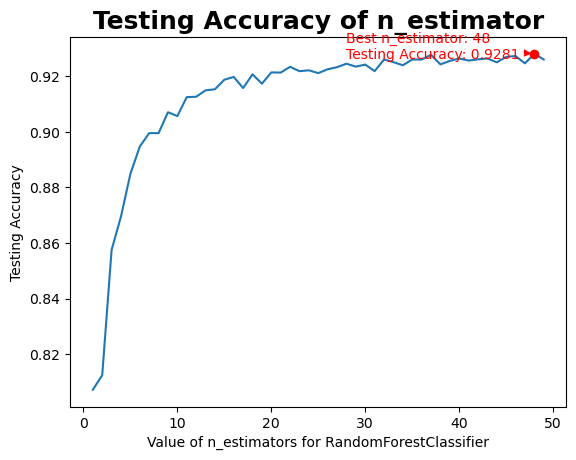

In [28]:
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
xplot = range(1, 50)
yplot = scores

max_index = np.argmax(yplot)

max_x = xplot[max_index]
max_y = yplot[max_index]


plt.plot(xplot, yplot)
plt.plot(max_x, max_y,"ro")
plt.xlabel('Value of n_estimators for RandomForestClassifier')
plt.ylabel('Testing Accuracy')
plt.title("Testing Accuracy of n_estimator", fontsize=18, fontweight="bold")
plt.annotate(f'Best n_estimator: {max_x}\nTesting Accuracy: {max_y:.4f}', xy=(max_x,max_y),xytext=(max_x - 20, max_y - 0.0018), color='red', arrowprops=dict(arrowstyle='-|>',color='red',ls='--'))

In [29]:
max_index = np.argmax(yplot)

max_x = xplot[max_index]
max_y = yplot[max_index]

print(max_x)
print(max_y)

48
0.9281283288426593


In [30]:
# 48 is the optimal number of decision trees

Train the model

Work Cited: https://www.kaggle.com/code/yazeedalsahouri03/olympics-prediction#The-Model

In [40]:
import seaborn as sns
model = RandomForestClassifier(n_estimators=48,n_jobs=-1)

In [41]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=48, n_jobs=-1)

In [42]:
model.score(X_test,y_test)

0.925747227269879

In [43]:
y_pre= model.predict(X_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      Bronze       0.93      0.93      0.93      3980
        Gold       0.94      0.93      0.93      4036
    No Medal       0.91      0.92      0.91      3994
      Silver       0.93      0.93      0.93      3949

    accuracy                           0.93     15959
   macro avg       0.93      0.93      0.93     15959
weighted avg       0.93      0.93      0.93     15959



In [44]:
confusion_matrix(y_test,y_pre)

array([[3687,   73,  154,   66],
       [  56, 3764,  114,  102],
       [ 121,   92, 3664,  117],
       [  85,   91,  114, 3659]], dtype=int64)

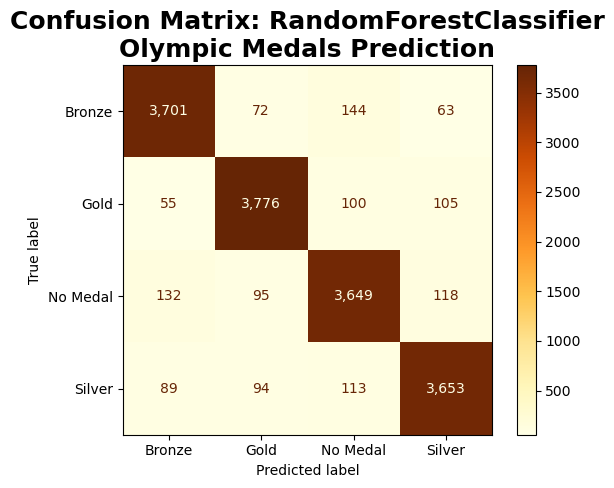

In [45]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=["Bronze","Gold","No Medal","Silver"], values_format=',.0f', cmap='YlOrBr')

plt.title('Confusion Matrix: RandomForestClassifier\nOlympic Medals Prediction', fontsize=18, fontweight="bold")
plt.show()

### Feature Importance

In [46]:
importance = dict(zip(model.feature_names_in_,model.feature_importances_))
sorted(importance.items(),key=lambda x:x[1],reverse=True)

[('NOC', 0.2586317309456662),
 ('Sport', 0.1769263700959827),
 ('Weight', 0.17372066025686914),
 ('Height', 0.17343619771961924),
 ('Age', 0.16512503546607749),
 ('Year', 0.023553103100421868),
 ('Sex', 0.01490219221536192),
 ('Season', 0.013704710200001446)]

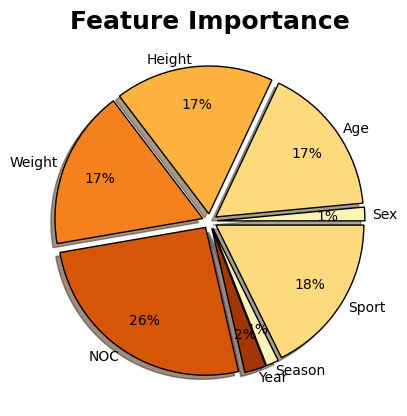

In [47]:
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)
plt.pie(model.feature_importances_, labels=model.feature_names_in_, pctdistance=.75,labeldistance=1.05,autopct="%1.0f%%", explode=explode, shadow=True, wedgeprops={"edgecolor":"black", 'linewidth':1, 'antialiased':True}, colors=sns.color_palette('YlOrBr'))
plt.title("Feature Importance", fontsize=18, fontweight="bold")

plt.show()

In [48]:
# Save off my models
import pickle

# Model
pickle.dump(model, open("Olympic_model.h5", 'wb'))